# SolarAnalysis

### Mindestanforderung an das Projekt:
Das Projekt muss ein Projekt zum Thema Applied Data Science sein, d.h. auf den im Modul Applied Data Science behandelten Inhalten aufbauen.
Das Projekt muss mehrere im Modul vorgestellte Themen integrieren, im Minimum sind dies die folgenden: 
* (4) Versionierung und Verfügbarmachen der Daten und des Modells über Github
* (1) Datenerhebung mittels Web Scraping und/oder API
* (2) Datenaufbereitung (dazu können auch Methoden aus Data Science Fundamantals verwendet werden)
* (3) Verwendung eines ML Frameworks/Library (tensorflow/keras, sklearn oder auch einige im Kurs nicht betrachtete wie pytorch) 
* (5) Betrachtung Ethische Fragestellungen im Zusammenhang mit dem Projekt

Rosalias first change: 
Samuel hat einiges schon gemacht.

1. Rohdaten eingelesen 
2. Energie total, die produziert wird ausgegeben (addieren war nötig)
3. Cleanup
4. Daten geprüft nach Cleanup
5. Visualisiert
6. Datensätze für die Vergangenheit manuell hinzugefügt für weitere Analysen (wenn man die Monate miteinander vergleichen will - z.b. im Januar das Wetter vom Januar des vorherhigen Jahres einbeziehen). Die Daten kann man einsehen auf der Wetterseit, er musste sie nicht erfinden. Die Daten vom erheben der Daten und vom erstellen des Datensatzes nicht übereinstimmen, sind die Grafiken bei der Visualisierung verzerrt. Das muss man sich bewusst sein und deswegen benutzen wir die manuell erstellten Daten vorsichtshalber nicht für das Predictive Model.
7. Daten visualisiert
8. Smoothing Data (Abbildung an der Präsi bringen)
9. verschiedene Schlüsse gezogen, z.b. Wenn es stark regnet oder schatten ist energie 0

Samuel macht Git Repo und bindet Daten ein - mit API oder Scraping. Zudem macht er nochmals wenig cleaning, beispielsweise Wetter max/min kann raus
Stefan & Rosalia spielen dann mit den Daten, bauen Modells und vergleichen

ethisch: noch beantworten - Ziel der Arbeit: Besitzer der Solaranlage wissen, wie und wann Strom gebraucht wird, damit sie ihn sprich Maschinen im Haushalt effizient nutzen können
    

### Zusatzpunkte für Projektarbeit, falls folgendes erfüllt:
* Kreativität der Umsetzung (kreativ ist alles, was in den Lektionen und Übungen nicht vorgegeben wurde)
* Verwendung von sowohl Web Scraping als auch API's für den Datenbezug
* Verwendung mehr als eine Programmiersprache (z.B. Python und R)
* Verwendung von Docker oder eines Cloud-Services (z.B. Jupyter-Notebook via Sagemaker)
* Verwendung einer fortgeschrittenen Deep Learning Struktur/Technik (z.B.CNN, RNN, Transfer Learning, Transformers…)
* Zusätzliche Integration von Operations Research Methoden (Lineare Optimierung) und/oder eines Blockchain-Modells

### Referat zum Projekt (max. 9 von total 18 Punkten):
* Qualität der Präsentation und Vertrautheit mit dem Projekt selbst
* Fähigkeit, Fragen zum Projekt zu antworten 
* Fähigkeit, Fragen zu den Kursinhalten im Allgemeinen zu beantworten

### Vorgehen
* 1. Erstellen von GIT repo. Update auf diesem Repo
* 2. Laden des vergangenen Wetters mittels Web Scaping von https://www.timeanddate.com/weather/switzerland/zurich/historic
* 3. Bei Datenaufbereitung verbessern ink Wetter.
* 4. Predictions ausprobieren (verwenden verschiedener ML-Frameworks wie Tensorflow)
* 5. Erstellen der Präsentation (Betrachten der Ethnischen Fragestellung mit diesem Projekt)

Rohdaten vom solarlogger.csv<br>
Datenfelder: "ID","InstallationNR","DateTime","Data"

In [4]:
"1","4","2017-07-02 16:00:52","{ &quot;solarinstallationname&quot;: &quot;CH_AG&quot;, &quot;requesttime&quot;: &quot;2017.07.02 16:00:52&quot;, &quot;devices&quot;: [{&quot;device&quot;: &quot;01&quot;, &quot;ENERGY_DAY&quot;: 8.4, &quot;ENERGY_MONTH&quot;: 44, &quot;ENERGY_YEAR&quot;: 4865, &quot;ENERGY_TOTAL&quot;: 27159, &quot;TEMPERATURE_MAXIMUM&quot;: 39, &quot;P_AC&quot;: 3066, &quot;U_AC_L1&quot;: 238.5, &quot;U_AC_L2&quot;: 237.7, &quot;U_AC_L3&quot;: 237.3, &quot;I_AC_L1&quot;: 2.24, &quot;I_AC_L2&quot;: 2.2, &quot;I_AC_L3&quot;: 2.24, &quot;U_AC_10_MIN_MEAN_L1&quot;: 237.4, &quot;U_AC_10_MIN_MEAN_L2&quot;: 237.4, &quot;U_AC_10_MIN_MEAN_L3&quot;: 236.8, &quot;U_DC_L1&quot;: 685.6, &quot;U_DC_L2&quot;: 693.7, &quot;I_DC_L1&quot;: 1.11, &quot;I_DC_L2&quot;: 1.01}, {&quot;device&quot;: &quot;02&quot;, &quot;ENERGY_DAY&quot;: 8.4, &quot;ENERGY_MONTH&quot;: 45, &quot;ENERGY_YEAR&quot;: 5204, &quot;ENERGY_TOTAL&quot;: 29016, &quot;TEMPERATURE_MAXIMUM&quot;: 40, &quot;P_AC&quot;: 3056, &quot;U_AC_L1&quot;: 237.2, &quot;U_AC_L2&quot;: 237.2, &quot;U_AC_L3&quot;: 238.1, &quot;I_AC_L1&quot;: 2.24, &quot;I_AC_L2&quot;: 2.24, &quot;I_AC_L3&quot;: 2.19, &quot;U_AC_10_MIN_MEAN_L1&quot;: 237, &quot;U_AC_10_MIN_MEAN_L2&quot;: 236.3, &quot;U_AC_10_MIN_MEAN_L3&quot;: 236.9, &quot;U_DC_L1&quot;: 670.1, &quot;U_DC_L2&quot;: 674.1, &quot;I_DC_L1&quot;: 1.14, &quot;I_DC_L2&quot;: 1.11}]}"

('1',
 '4',
 '2017-07-02 16:00:52',
 '{ &quot;solarinstallationname&quot;: &quot;CH_AG&quot;, &quot;requesttime&quot;: &quot;2017.07.02 16:00:52&quot;, &quot;devices&quot;: [{&quot;device&quot;: &quot;01&quot;, &quot;ENERGY_DAY&quot;: 8.4, &quot;ENERGY_MONTH&quot;: 44, &quot;ENERGY_YEAR&quot;: 4865, &quot;ENERGY_TOTAL&quot;: 27159, &quot;TEMPERATURE_MAXIMUM&quot;: 39, &quot;P_AC&quot;: 3066, &quot;U_AC_L1&quot;: 238.5, &quot;U_AC_L2&quot;: 237.7, &quot;U_AC_L3&quot;: 237.3, &quot;I_AC_L1&quot;: 2.24, &quot;I_AC_L2&quot;: 2.2, &quot;I_AC_L3&quot;: 2.24, &quot;U_AC_10_MIN_MEAN_L1&quot;: 237.4, &quot;U_AC_10_MIN_MEAN_L2&quot;: 237.4, &quot;U_AC_10_MIN_MEAN_L3&quot;: 236.8, &quot;U_DC_L1&quot;: 685.6, &quot;U_DC_L2&quot;: 693.7, &quot;I_DC_L1&quot;: 1.11, &quot;I_DC_L2&quot;: 1.01}, {&quot;device&quot;: &quot;02&quot;, &quot;ENERGY_DAY&quot;: 8.4, &quot;ENERGY_MONTH&quot;: 45, &quot;ENERGY_YEAR&quot;: 5204, &quot;ENERGY_TOTAL&quot;: 29016, &quot;TEMPERATURE_MAXIMUM&quot;: 40, &quot;P_AC&qu

### Set libss

In [1]:
# Importing libraries
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
pd.set_option('mode.use_inf_as_na', True)

import warnings                                  # deal with warnings
warnings.filterwarnings('ignore')

### Importing and preparing data

In [2]:
def html_decode(s):
    """
    Returns the ASCII decoded version of the given HTML string. This does
    NOT remove normal HTML tags like <p>.
    """
    htmlCodes = (
            ("'", '&#39;'),
            ('"', '&quot;'),
            ('>', '&gt;'),
            ('<', '&lt;'),
            ('&', '&amp;')
        )
    for code in htmlCodes:
        s = s.replace(code[1], code[0])
    return s

In [ ]:
# Reading data and extract json content
energy = pd.read_csv('solarlogger.csv', parse_dates=['DateTime'])
totalData = len(energy.index)
print('Total Datasets ' + str(totalData))

import json
for idx, data in enumerate(energy['Data']):
    dataobject = json.loads(html_decode(data))
    for key, value in dataobject.items():
        if(key == 'devices'):
            for key2, deviceDta in enumerate(value):
                deviceKey = 'd' + str(key2)
                for key3, devicePwr in deviceDta.items(): 
                    devicePwrKey = deviceKey + '_' + str(key3)
                    if(devicePwrKey not in energy):
                        energy[devicePwrKey] = np.nan
                    energy[devicePwrKey][idx] = devicePwr
                    #print(devicePwrKey, devicePwr)
        else:
            if (key not in energy):
                energy[key] = np.nan
            energy[key][idx] = value
    #if(idx > 2):
    #    break
    if(idx % 2500 == 0):
        print('pos ' + str(idx) + '/' + str(totalData))

# Add year, month, weekday and hour
energy['year']          = energy['DateTime'].dt.year
energy['month']         = energy['DateTime'].dt.month
energy['day']           = energy['DateTime'].dt.day
energy['weekday']       = energy['DateTime'].dt.day_name()
energy['weekday_num']   = energy['DateTime'].dt.weekday + 1
energy['time_hour']     = energy['DateTime'].dt.hour

# Set index
energy = energy.set_index('DateTime')

# Showing the dataframe
energy

Total Datasets 84671
pos 0/84671
pos 2500/84671
pos 5000/84671
pos 7500/84671
pos 10000/84671
pos 12500/84671
pos 15000/84671
pos 17500/84671
pos 20000/84671


In [ ]:
# Combine energy output and do cleanup
columns = ['Data', 'd0_device', 'd1_device', 'InstallationNR']
energy.drop(columns, inplace=True, axis=1)

energy['producedDay'] = energy['d0_ENERGY_DAY'] + energy['d1_ENERGY_DAY']
energy['producedMonth'] = energy['d0_ENERGY_MONTH'] + energy['d1_ENERGY_MONTH']
energy['producedYear'] = energy['d0_ENERGY_YEAR'] + energy['d1_ENERGY_YEAR']
energy['producedTotal'] = energy['d0_ENERGY_TOTAL'] + energy['d1_ENERGY_TOTAL']
energy['producing'] = energy['d0_P_AC'] + energy['d1_P_AC']

In [160]:
# Summary statistics of variables
energy.describe()

,ID,d0_ENERGY_DAY,d0_ENERGY_MONTH,d0_ENERGY_YEAR,d0_ENERGY_TOTAL,d0_TEMPERATURE_MAXIMUM,d0_P_AC,d0_U_AC_L1,d0_U_AC_L2,d0_U_AC_L3,...,year,month,day,weekday_num,time_hour,producedDay,producedMonth,producedYear,producedTotal,producing
count,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,...,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000,84671.000000
mean,42341.473196,14.505143,423.320810,4911.633239,43016.843654,34.933909,2225.840063,233.557579,234.112991,233.546413,...,2018.783361,6.665694,15.846264,3.995736,12.830402,30.376161,878.337667,10256.302759,89271.524876,4636.815403
std,24444.977868,14.855274,334.693188,2931.707720,9097.879890,8.431617,2176.625224,26.524722,26.638135,26.357780,...,1.008381,3.011656,8.792005,1.995369,3.711480,30.742626,683.925510,6051.096506,18972.877584,4523.178226
min,1.000000,0.000000,0.000000,0.000000,607.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2014.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1188.800000,0.000000
25%,21172.500000,1.800000,142.000000,2281.500000,35018.500000,28.000000,469.000000,234.000000,234.600000,234.100000,...,2018.000000,4.000000,8.000000,2.000000,10.000000,3.900000,301.000000,4889.000000,72640.000000,970.000000
50%,42340.000000,8.900000,342.000000,5290.000000,42765.000000,35.000000,1353.000000,236.600000,237.200000,236.600000,...,2019.000000,7.000000,16.000000,4.000000,13.000000,19.000000,715.000000,11012.000000,88825.000000,2779.000000
75%,63511.500000,24.400000,659.000000,7617.000000,50195.000000,43.000000,3662.000000,238.600000,239.000000,238.600000,...,2020.000000,9.000000,23.000000,6.000000,16.000000,51.600000,1366.000000,15801.000000,104273.000000,7718.000000
max,84679.000000,57.900000,1482.100000,9986.600000,58062.000000,49.000000,16000.000000,2390.000000,2394.000000,2390.000000,...,2021.000000,12.000000,31.000000,7.000000,22.000000,117.500000,2931.800000,19281.300000,120713.000000,32000.000000


In [161]:
# Check data types
energy.dtypes

ID                          int64
solarinstallationname      object
requesttime                object
d0_ENERGY_DAY             float64
d0_ENERGY_MONTH           float64
d0_ENERGY_YEAR            float64
d0_ENERGY_TOTAL           float64
d0_TEMPERATURE_MAXIMUM    float64
d0_P_AC                   float64
d0_U_AC_L1                float64
d0_U_AC_L2                float64
d0_U_AC_L3                float64
d0_I_AC_L1                float64
d0_I_AC_L2                float64
d0_I_AC_L3                float64
d0_U_AC_10_MIN_MEAN_L1    float64
d0_U_AC_10_MIN_MEAN_L2    float64
d0_U_AC_10_MIN_MEAN_L3    float64
d0_U_DC_L1                float64
d0_U_DC_L2                float64
d0_I_DC_L1                float64
d0_I_DC_L2                float64
d1_ENERGY_DAY             float64
d1_ENERGY_MONTH           float64
d1_ENERGY_YEAR            float64
d1_ENERGY_TOTAL           float64
d1_TEMPERATURE_MAXIMUM    float64
d1_P_AC                   float64
d1_U_AC_L1                float64
d1_U_AC_L2    

In [162]:
# Check for missing values and drop it columnwise if exist
print(energy.isna().sum())
energy = energy.dropna()

ID                        0
solarinstallationname     0
requesttime               0
d0_ENERGY_DAY             0
d0_ENERGY_MONTH           0
d0_ENERGY_YEAR            0
d0_ENERGY_TOTAL           0
d0_TEMPERATURE_MAXIMUM    0
d0_P_AC                   0
d0_U_AC_L1                0
d0_U_AC_L2                0
d0_U_AC_L3                0
d0_I_AC_L1                0
d0_I_AC_L2                0
d0_I_AC_L3                0
d0_U_AC_10_MIN_MEAN_L1    1
d0_U_AC_10_MIN_MEAN_L2    1
d0_U_AC_10_MIN_MEAN_L3    1
d0_U_DC_L1                1
d0_U_DC_L2                1
d0_I_DC_L1                1
d0_I_DC_L2                1
d1_ENERGY_DAY             0
d1_ENERGY_MONTH           0
d1_ENERGY_YEAR            0
d1_ENERGY_TOTAL           0
d1_TEMPERATURE_MAXIMUM    0
d1_P_AC                   0
d1_U_AC_L1                0
d1_U_AC_L2                0
d1_U_AC_L3                0
d1_I_AC_L1                0
d1_I_AC_L2                0
d1_I_AC_L3                0
d1_U_AC_10_MIN_MEAN_L1    1
d1_U_AC_10_MIN_MEAN_

In [209]:
#energyByMonth = energy.groupby(['year','month']).max()
energyByMonth = energy.groupby(['year','month']).tail(1)
energyByMonth

,ID,solarinstallationname,requesttime,d0_ENERGY_DAY,d0_ENERGY_MONTH,d0_ENERGY_YEAR,d0_ENERGY_TOTAL,d0_TEMPERATURE_MAXIMUM,d0_P_AC,d0_U_AC_L1,...,producedMonth,producedYear,producedTotal,producing,sin_hour,cos_hour,sin_weekday,cos_weekday,sin_month,cos_month
DateTime,,,,,,,,,,,,,,,,,,,,,
2014-06-28 22:00:00,1542,Morgenacherstr. 50,2014-06-28 22:00:00,0.0,607.0,607.0,607.0,0.0,0.0,0.0,...,1188.8,1188.8,1188.8,0.0,-0.500000,0.866025,-7.818315e-01,0.623490,1.224647e-16,-1.000000e+00
2014-07-28 22:00:00,1543,Morgenacherstr. 50,2014-07-28 22:00:00,0.0,1009.7,1616.7,1616.7,0.0,0.0,0.0,...,2018.0,3206.8,3206.8,0.0,-0.500000,0.866025,7.818315e-01,0.623490,-5.000000e-01,-8.660254e-01
2014-08-28 22:00:00,1544,Morgenacherstr. 50,2014-08-28 22:00:00,0.0,1025.9,2642.6,2642.6,0.0,0.0,0.0,...,2052.2,5259.0,5259.0,0.0,-0.500000,0.866025,-4.338837e-01,-0.900969,-8.660254e-01,-5.000000e-01
2014-09-28 22:00:00,1545,Morgenacherstr. 50,2014-09-28 22:00:00,0.0,895.9,3538.5,3538.5,0.0,0.0,0.0,...,1760.3,7019.3,7019.3,0.0,-0.500000,0.866025,-2.449294e-16,1.000000,-1.000000e+00,-1.836970e-16
2014-10-28 22:00:00,1546,Morgenacherstr. 50,2014-10-28 22:00:00,0.0,620.9,4159.4,4159.4,0.0,0.0,0.0,...,1197.6,8216.9,8216.9,0.0,-0.500000,0.866025,9.749279e-01,-0.222521,-8.660254e-01,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:05:40,79938,Morgenacherstr. 50,2020.09.30 19:05:40,22.3,805.0,8073.0,57226.0,33.0,0.0,0.9,...,1700.0,16906.0,118906.0,0.0,-0.965926,0.258819,4.338837e-01,-0.900969,-1.000000e+00,-1.836970e-16
2020-10-31 17:15:32,81833,Morgenacherstr. 50,2020.10.31 17:15:32,9.7,458.0,8531.0,57684.0,28.0,0.0,0.9,...,969.0,17876.0,119876.0,108.0,-0.965926,-0.258819,-7.818315e-01,0.623490,-8.660254e-01,5.000000e-01
2020-11-30 16:25:38,83422,Morgenacherstr. 50,2020.11.30 16:25:38,3.4,269.0,8801.0,57954.0,25.0,0.0,0.9,...,589.0,18466.0,120466.0,118.0,-0.866025,-0.500000,7.818315e-01,0.623490,-5.000000e-01,8.660254e-01


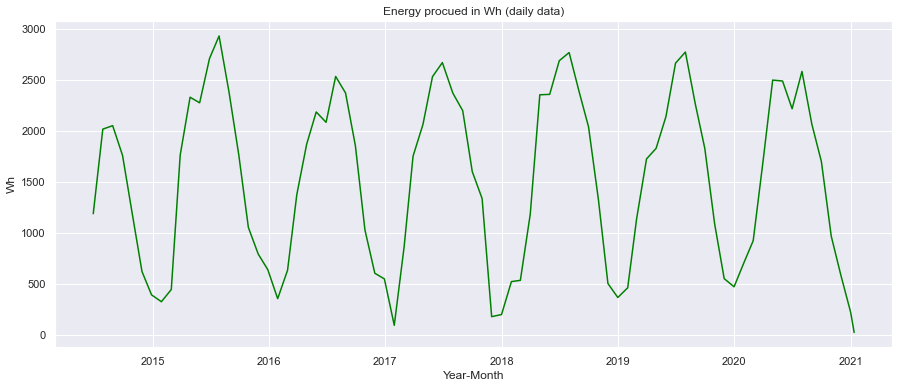

In [215]:
# Plot full time-series of electricity consumtion as line-plot
plt.figure(figsize=(15, 6))
plt.plot(energyByMonth.producedMonth, color='#008000')
plt.title('Energy procued in Wh (daily data)')
plt.xlabel("Year-Month")
plt.ylabel("Wh")
plt.grid(True)
plt.show()

In [211]:
#energyByDay
energyByDay = energy.groupby(['year','month','day']).tail(1)
energyByDay

,ID,solarinstallationname,requesttime,d0_ENERGY_DAY,d0_ENERGY_MONTH,d0_ENERGY_YEAR,d0_ENERGY_TOTAL,d0_TEMPERATURE_MAXIMUM,d0_P_AC,d0_U_AC_L1,...,producedMonth,producedYear,producedTotal,producing,sin_hour,cos_hour,sin_weekday,cos_weekday,sin_month,cos_month
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-07-02 21:01:03,31,Morgenacherstr. 50,2017.07.02 21:01:03,11.4,47.0,4868.0,27162.0,35.0,0.0,0.9,...,95.0,10075.0,56181.0,0.0,-0.707107,0.707107,-2.449294e-16,1.000000,-0.5,-0.866025
2017-07-03 21:27:06,125,Morgenacherstr. 50,2017.07.03 21:27:06,48.3,95.0,4916.0,27211.0,37.0,218.0,236.8,...,192.0,10173.0,56279.0,430.0,-0.707107,0.707107,7.818315e-01,0.623490,-0.5,-0.866025
2017-07-04 21:25:17,220,Morgenacherstr. 50,2017.07.04 21:25:17,51.8,147.0,4968.0,27263.0,37.0,0.0,0.9,...,300.0,10280.0,56387.0,224.0,-0.707107,0.707107,9.749279e-01,-0.222521,-0.5,-0.866025
2017-07-05 21:16:15,314,Morgenacherstr. 50,2017.07.05 21:16:15,50.3,198.0,5018.0,27313.0,38.0,0.0,0.9,...,405.0,10384.0,56491.0,232.0,-0.707107,0.707107,4.338837e-01,-0.900969,-0.5,-0.866025
2017-07-06 21:15:39,408,Morgenacherstr. 50,2017.07.06 21:15:39,51.4,249.0,5070.0,27364.0,39.0,240.0,234.6,...,511.0,10492.0,56597.0,240.0,-0.707107,0.707107,-4.338837e-01,-0.900969,-0.5,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07 15:25:58,84570,Morgenacherstr. 50,2021.01.07 15:25:58,0.4,8.0,8.0,58060.0,21.0,0.0,0.9,...,18.0,18.0,120707.0,116.0,-0.707107,-0.707107,-4.338837e-01,-0.900969,0.5,0.866025
2021-01-08 14:56:28,84588,Morgenacherstr. 50,2021.01.08 14:56:28,0.1,8.0,8.0,58060.0,21.0,0.0,0.9,...,18.0,18.0,120708.0,110.0,-0.500000,-0.866025,-9.749279e-01,-0.222521,0.5,0.866025
2021-01-09 15:05:46,84618,Morgenacherstr. 50,2021.01.09 15:05:46,0.7,8.0,8.0,58061.0,22.0,0.0,0.9,...,19.0,19.0,120710.0,116.0,-0.707107,-0.707107,-7.818315e-01,0.623490,0.5,0.866025


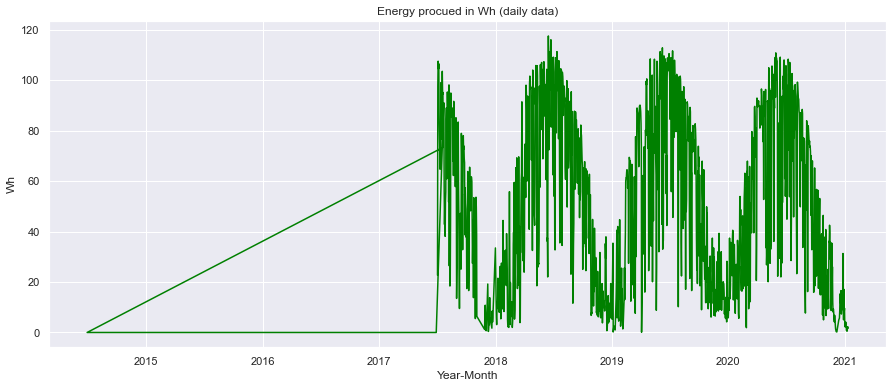

In [216]:
# Plot full time-series of electricity consumtion as line-plot
plt.figure(figsize=(15, 6))
plt.plot(energyByDay.producedDay, color='#008000')
plt.title('Energy procued in Wh (daily data)')
plt.xlabel("Year-Month")
plt.ylabel("Wh")
plt.grid(True)
plt.show()

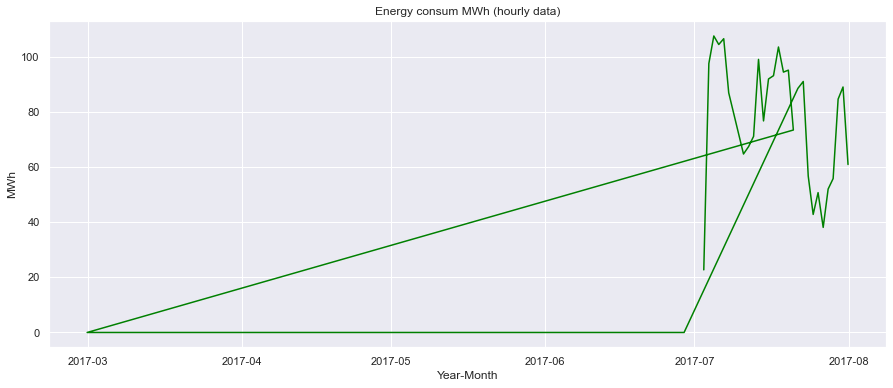

In [213]:
# Plot full time-series of electricity consumtion as line-plot
plt.figure(figsize=(15, 6))
plt.plot(energyByDay.loc['2017-02-01':'2017-07-31'].producedDay, color='#008000')
plt.title('Energy consum MWh (hourly data)')
plt.xlabel("Year-Month")
plt.ylabel("MWh")
plt.grid(True)
plt.show()

In [214]:
#Grund für problem:
#1. Solaranlage wurde am 02.07.2017 angebunden
#2. Alte Monatswerte wurde aus Excel generiert per SQL Inserts

### Encoding cyclical time variables using sin() and cos()

energyByMonth
                       ID solarinstallationname          requesttime  \
DateTime                                                               
2014-06-28 22:00:00  1542    Morgenacherstr. 50  2014-06-28 22:00:00   
2014-07-28 22:00:00  1543    Morgenacherstr. 50  2014-07-28 22:00:00   
2014-08-28 22:00:00  1544    Morgenacherstr. 50  2014-08-28 22:00:00   
2014-09-28 22:00:00  1545    Morgenacherstr. 50  2014-09-28 22:00:00   
2014-10-28 22:00:00  1546    Morgenacherstr. 50  2014-10-28 22:00:00   

                     d0_ENERGY_DAY  d0_ENERGY_MONTH  d0_ENERGY_YEAR  \
DateTime                                                              
2014-06-28 22:00:00            0.0            607.0           607.0   
2014-07-28 22:00:00            0.0           1009.7          1616.7   
2014-08-28 22:00:00            0.0           1025.9          2642.6   
2014-09-28 22:00:00            0.0            895.9          3538.5   
2014-10-28 22:00:00            0.0            620.9    

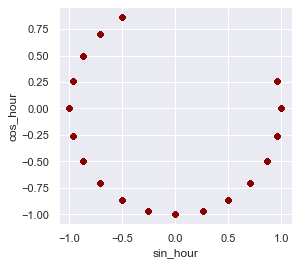

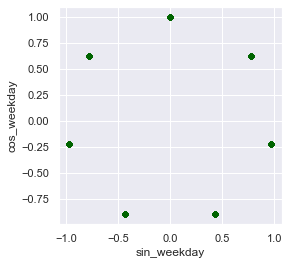

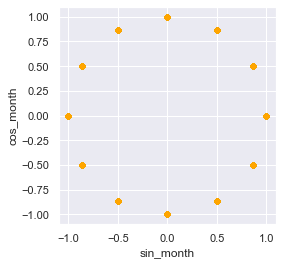

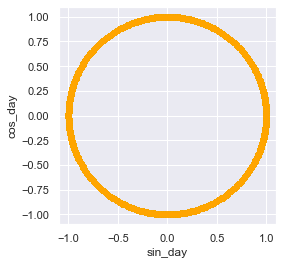

In [438]:
# Further reading:
# https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time
# https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning
# https://www.avanwyk.com/encoding-cyclical-features-for-deep-learning/

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

# Encoding hours per day
energy['sin_hour'] = np.sin(2*np.pi*energy.time_hour/24)
energy['cos_hour'] = np.cos(2*np.pi*energy.time_hour/24)

# Encoding weekdays per week
energy['sin_weekday'] = np.sin(2*np.pi*energy.weekday_num/7)
energy['cos_weekday'] = np.cos(2*np.pi*energy.weekday_num/7)

# Encoding months per year
energy['sin_month'] = np.sin(2*np.pi*energy.month/12)
energy['cos_month'] = np.cos(2*np.pi*energy.month/12)

# Encoding days per year
energy['sin_day'] = np.sin(2*np.pi*(energy.month * 30 + energy.day)/360)
energy['cos_day'] = np.cos(2*np.pi*(energy.month * 30 + energy.day)/360)

energyByMonth = energy.groupby(['year','month']).tail(1)
print('energyByMonth')
print(energyByMonth.head(5))
energyByDay = energy.groupby(['year','month','day']).tail(1)
print('energyByDay')
energyByDay = energyByDay.loc['2017-05-01':'2021-02-01']
print(energyByDay.head(5))

# Plots
energy.plot.scatter('sin_hour','cos_hour', c="darkred").set_aspect('equal')
energy.plot.scatter('sin_weekday','cos_weekday', c="darkgreen").set_aspect('equal')
energy.plot.scatter('sin_month','cos_month', c="orange").set_aspect('equal')
energy.plot.scatter('sin_day','cos_day', c="orange").set_aspect('equal')

# Check values
print(energy[['time_hour', 
               'sin_hour', 
               'cos_hour', 
               'sin_weekday', 
               'sin_weekday', 
               'sin_month', 
               'cos_month']].loc['2019-12-31':'2020-01-01']
 )

In [358]:
# Slicer with start and end date
energy.loc['2019-07-01':'2019-07-20'].head(5)

,ID,solarinstallationname,requesttime,d0_ENERGY_DAY,d0_ENERGY_MONTH,d0_ENERGY_YEAR,d0_ENERGY_TOTAL,d0_TEMPERATURE_MAXIMUM,d0_P_AC,d0_U_AC_L1,...,producedMonth,producedYear,producedTotal,producing,sin_hour,cos_hour,sin_weekday,cos_weekday,sin_month,cos_month
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-07-01 05:46:50,46865,Morgenacherstr. 50,2019.07.01 05:46:50,0.0,0.0,4773.0,44823.0,32.0,167.0,235.4,...,0.0,9971.0,93011.0,330.0,0.965926,2.588190e-01,0.781831,0.62349,-0.5,-0.866025
2019-07-01 05:56:51,46866,Morgenacherstr. 50,2019.07.01 05:56:51,0.0,0.0,4773.0,44823.0,33.0,246.0,235.1,...,0.0,9971.0,93011.0,491.0,0.965926,2.588190e-01,0.781831,0.62349,-0.5,-0.866025
2019-07-01 06:06:51,46867,Morgenacherstr. 50,2019.07.01 06:06:51,0.0,0.0,4773.0,44823.0,33.0,346.0,236.0,...,0.0,9971.0,93011.0,696.0,1.000000,6.123234e-17,0.781831,0.62349,-0.5,-0.866025
2019-07-01 06:16:51,46868,Morgenacherstr. 50,2019.07.01 06:16:51,0.1,0.0,4773.0,44823.0,34.0,431.0,237.7,...,0.0,9971.0,93011.0,856.0,1.000000,6.123234e-17,0.781831,0.62349,-0.5,-0.866025
2019-07-01 06:26:52,46869,Morgenacherstr. 50,2019.07.01 06:26:52,0.2,0.0,4773.0,44823.0,34.0,467.0,235.0,...,0.0,9971.0,93011.0,935.0,1.000000,6.123234e-17,0.781831,0.62349,-0.5,-0.866025


### Smoothing data using the moving average function


In [359]:
# Explanations
# https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

In [360]:
# Moving average of all variables in the dataframe with defined window-size
window = 24
# energy_ma = energy.rolling(window=window, min_periods = 1, center=True, closed="both").mean()
energy_ma = energy.rolling(window=window).mean()
energy_ma.producing[:50]

DateTime
2017-07-02 16:00:52            NaN
2017-07-02 16:10:53            NaN
2017-07-02 16:20:53            NaN
2017-07-02 16:30:54            NaN
2017-07-02 16:40:54            NaN
2017-07-02 16:50:54            NaN
2017-07-02 17:00:55            NaN
2017-07-02 17:10:55            NaN
2017-07-02 17:20:55            NaN
2017-07-02 17:30:56            NaN
2017-07-02 17:40:56            NaN
2017-07-02 17:50:56            NaN
2017-07-02 18:00:57            NaN
2017-07-02 18:10:57            NaN
2017-07-02 18:20:57            NaN
2017-07-02 18:30:58            NaN
2017-07-02 18:40:58            NaN
2017-07-02 18:50:58            NaN
2017-07-02 19:00:59            NaN
2017-07-02 19:10:59            NaN
2017-07-02 19:20:59            NaN
2017-07-02 19:31:00            NaN
2017-07-02 19:41:00            NaN
2017-07-02 19:51:00    2803.333333
2017-07-02 20:01:01    2601.500000
2017-07-02 20:11:01    2132.916667
2017-07-02 20:21:01    1947.833333
2017-07-02 20:31:02    1894.750000
2017-07-02 

### Visualizing time series data

In [361]:
# Importing libraries for vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

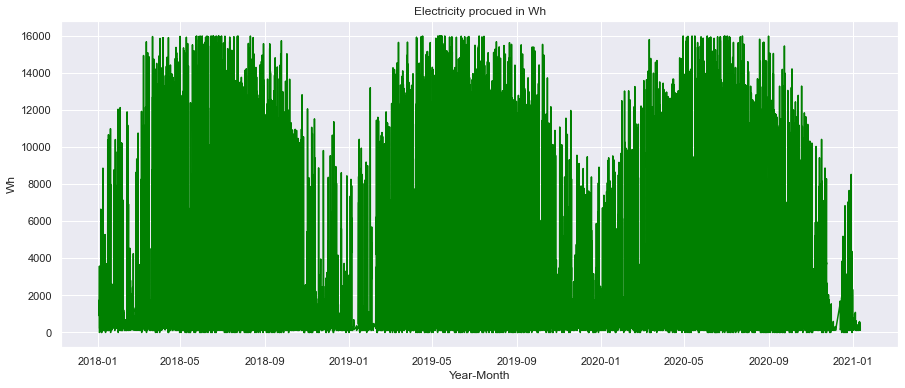

In [362]:
# Plot electricity consumtion of defined days
plt.figure(figsize=(15, 6))
plt.plot(energy.loc['2018-01-01':'2021-12-30'].producing, color='#008000')
plt.title('Electricity procued in Wh')
plt.xlabel("Year-Month")
plt.ylabel("Wh")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Energy produced by day (Wh)')

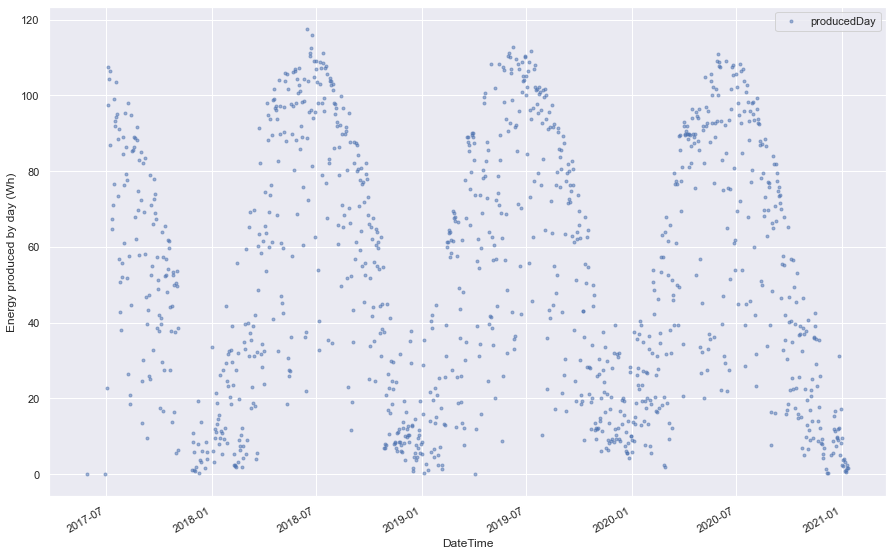

In [401]:
# Plot time series as dots, show consumtion, sunshine and mean temparature
cols_plot = ['producedDay']
axes = energyByDay[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 10), subplots=True)
axes[0].set_ylabel('Energy produced by day (Wh)')

Text(0, 0.5, 'Energy produced by month (Wh)')

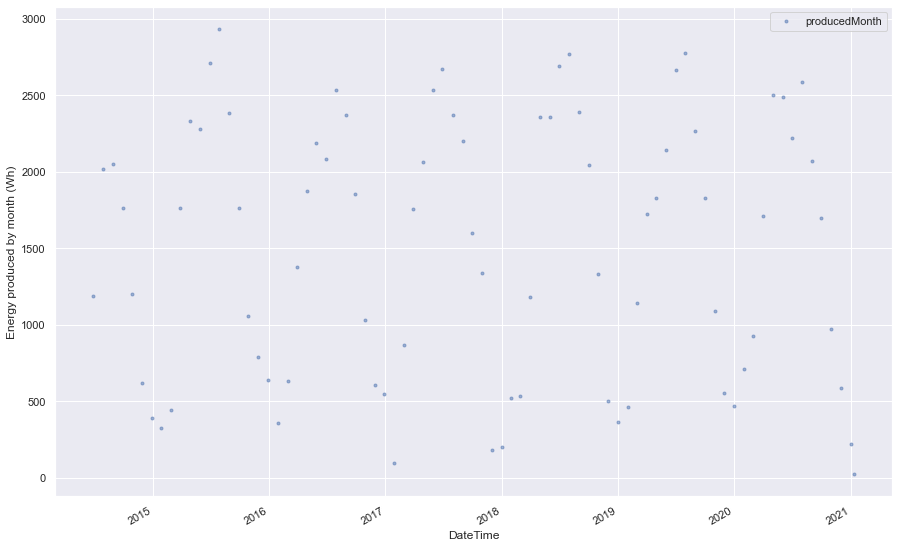

In [402]:
# Plot time series as dots, show consumtion, sunshine and mean temparature
cols_plot = ['producedMonth']
axes = energyByMonth[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 10), subplots=True)
axes[0].set_ylabel('Energy produced by month (Wh)')

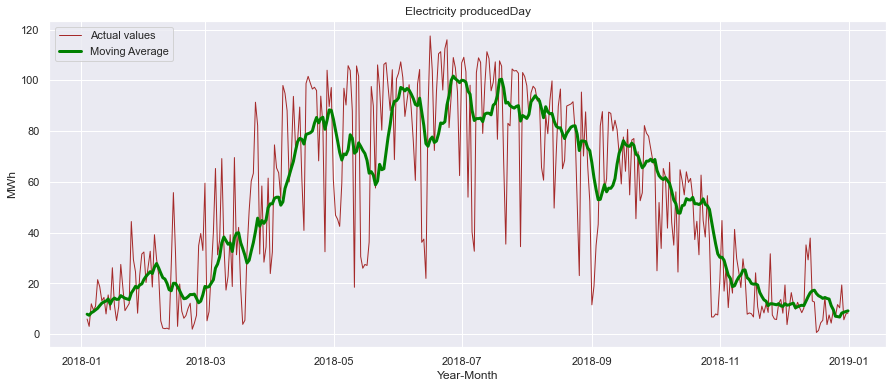

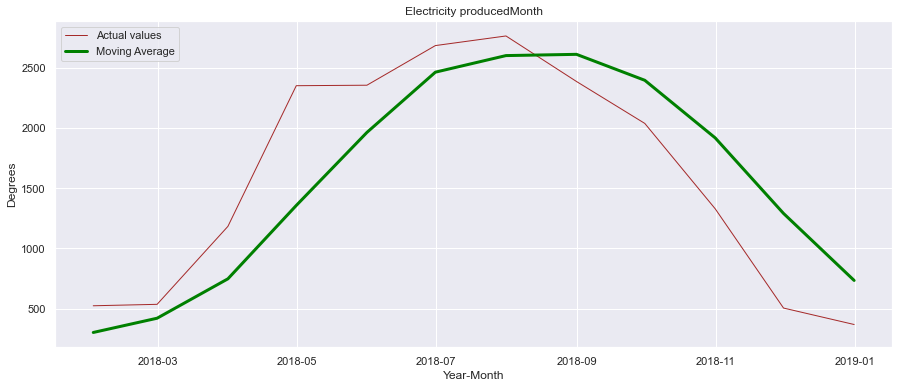

In [403]:
# Moving average of all variables in the dataframe with defined window-size
window = 12
# energy_ma = energy.rolling(window=window, min_periods = 1, center=True, closed="both").mean()
energyByDay_ma = energyByDay.rolling(window=window).mean()

# Moving average of electricity consumtion
plt.figure(figsize=(15, 6))
plt.plot(energyByDay.loc['2018-01-01':'2018-12-31'].producedDay, label="Actual values", color='brown', linewidth=1)
plt.plot(energyByDay_ma.loc['2018-01-01':'2018-12-31'].producedDay, label="Moving Average", color='green', linewidth=3)
plt.title('Electricity producedDay')
plt.xlabel("Year-Month")
plt.ylabel("MWh")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

window = 3
energyByMonth_ma = energyByMonth.rolling(window=window).mean()
plt.figure(figsize=(15, 6))
plt.plot(energyByMonth.loc['2018-01-01':'2018-12-31'].producedMonth, label="Actual values", color='brown', linewidth=1)
plt.plot(energyByMonth_ma.loc['2018-01-01':'2018-12-31'].producedMonth, label="Moving Average", color='green', linewidth=3)
plt.title('Electricity producedMonth')
plt.xlabel("Year-Month")
plt.ylabel("Degrees")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [404]:
#3. Remove all missing values from this new data set.
print(energy.isna().sum())
energy = energy.dropna()

ID                        0
solarinstallationname     0
requesttime               0
d0_ENERGY_DAY             0
d0_ENERGY_MONTH           0
d0_ENERGY_YEAR            0
d0_ENERGY_TOTAL           0
d0_TEMPERATURE_MAXIMUM    0
d0_P_AC                   0
d0_U_AC_L1                0
d0_U_AC_L2                0
d0_U_AC_L3                0
d0_I_AC_L1                0
d0_I_AC_L2                0
d0_I_AC_L3                0
d0_U_AC_10_MIN_MEAN_L1    0
d0_U_AC_10_MIN_MEAN_L2    0
d0_U_AC_10_MIN_MEAN_L3    0
d0_U_DC_L1                0
d0_U_DC_L2                0
d0_I_DC_L1                0
d0_I_DC_L2                0
d1_ENERGY_DAY             0
d1_ENERGY_MONTH           0
d1_ENERGY_YEAR            0
d1_ENERGY_TOTAL           0
d1_TEMPERATURE_MAXIMUM    0
d1_P_AC                   0
d1_U_AC_L1                0
d1_U_AC_L2                0
d1_U_AC_L3                0
d1_I_AC_L1                0
d1_I_AC_L2                0
d1_I_AC_L3                0
d1_U_AC_10_MIN_MEAN_L1    0
d1_U_AC_10_MIN_MEAN_

In [405]:
print(energyByDay.isna().sum())
energyByDay = energyByDay.dropna()

ID                        0
solarinstallationname     0
requesttime               0
d0_ENERGY_DAY             0
d0_ENERGY_MONTH           0
d0_ENERGY_YEAR            0
d0_ENERGY_TOTAL           0
d0_TEMPERATURE_MAXIMUM    0
d0_P_AC                   0
d0_U_AC_L1                0
d0_U_AC_L2                0
d0_U_AC_L3                0
d0_I_AC_L1                0
d0_I_AC_L2                0
d0_I_AC_L3                0
d0_U_AC_10_MIN_MEAN_L1    0
d0_U_AC_10_MIN_MEAN_L2    0
d0_U_AC_10_MIN_MEAN_L3    0
d0_U_DC_L1                0
d0_U_DC_L2                0
d0_I_DC_L1                0
d0_I_DC_L2                0
d1_ENERGY_DAY             0
d1_ENERGY_MONTH           0
d1_ENERGY_YEAR            0
d1_ENERGY_TOTAL           0
d1_TEMPERATURE_MAXIMUM    0
d1_P_AC                   0
d1_U_AC_L1                0
d1_U_AC_L2                0
d1_U_AC_L3                0
d1_I_AC_L1                0
d1_I_AC_L2                0
d1_I_AC_L3                0
d1_U_AC_10_MIN_MEAN_L1    0
d1_U_AC_10_MIN_MEAN_

In [406]:
print(energyByMonth.isna().sum())
energyByMonth = energyByMonth.dropna()

ID                        0
solarinstallationname     0
requesttime               0
d0_ENERGY_DAY             0
d0_ENERGY_MONTH           0
d0_ENERGY_YEAR            0
d0_ENERGY_TOTAL           0
d0_TEMPERATURE_MAXIMUM    0
d0_P_AC                   0
d0_U_AC_L1                0
d0_U_AC_L2                0
d0_U_AC_L3                0
d0_I_AC_L1                0
d0_I_AC_L2                0
d0_I_AC_L3                0
d0_U_AC_10_MIN_MEAN_L1    0
d0_U_AC_10_MIN_MEAN_L2    0
d0_U_AC_10_MIN_MEAN_L3    0
d0_U_DC_L1                0
d0_U_DC_L2                0
d0_I_DC_L1                0
d0_I_DC_L2                0
d1_ENERGY_DAY             0
d1_ENERGY_MONTH           0
d1_ENERGY_YEAR            0
d1_ENERGY_TOTAL           0
d1_TEMPERATURE_MAXIMUM    0
d1_P_AC                   0
d1_U_AC_L1                0
d1_U_AC_L2                0
d1_U_AC_L3                0
d1_I_AC_L1                0
d1_I_AC_L2                0
d1_I_AC_L3                0
d1_U_AC_10_MIN_MEAN_L1    0
d1_U_AC_10_MIN_MEAN_

# Classification and Regression Trees (CART)

In [407]:
# Further reading:
# https://www.digitalvidya.com/blog/classification-and-regression-trees

## Classification Trees

In [408]:
# Definition
# A classification tree is an algorithm where the target variable is fixed or categorical. 
# The algorithm is then used to identify the 'class' within which a target variable would most likely fall.
# An example is the prediction of plant species based on the specific characteristics of each species.

In [527]:
# Data (moving average with window size 12)
window = 12
energyByDay_ma = energyByDay.rolling(window=window).mean()
energy_cl = energyByDay_ma['2018-01-01':'2020-12-31']
energy_cl = energyByDay_ma.dropna()

energy_cl['origDate'] = pd.to_datetime(energy_cl.index.date).strftime("%Y.%m.%d")
energy_cl['date'] = pd.to_datetime(energy_cl.index.date)
energy_cl = energy_cl.set_index('date')
#print(energy_rt)
energy_cl['powerYesterday'] = 0.0;
for idx, data in energy_cl.iterrows():
    yesterday = idx - timedelta(days=1)
    #print(type(idx), type(yesterday))
    yesterDayElem = energy_cl[energy_cl['origDate'].str.contains(yesterday.strftime("%Y.%m.%d"))]
    #print(yesterDayElem)
    if(len(yesterDayElem) > 0):
        #print('adding',yesterday, yesterDayElem.producedDay[0])
        energy_cl['powerYesterday'][idx] = yesterDayElem.producedDay[0]
    
print(energy_cl.head(5))

# New binary (0/1) variable showing whether the electricity production is above or below the 75% Percentile
energy_cl['predictedproduce'] = 0
classnames = []
for i in range(0, 10):
    classnames.append(str(i))
    val = np.max(energyByDay_ma.producedDay) / 10 * i
    #print(val)
    energy_cl.loc[energy_cl['producedDay'] >= val, 'predictedproduce'] = i

# Check new binary variable
values, counts = np.unique(energy_cl.predictedproduce, return_counts=True)
print(values, counts)
print(energy_cl.head(5))

# Split data into target variable (y) and explanatory variables (X)
feature_cols = ['powerYesterday',
                'sin_day',
                'cos_day',
                'sin_month',
                'cos_month'
               ]
X = energy_cl[feature_cols]        # Features
y = energy_cl.predictedproduce     # Target variable

# Train and test data
X_train = X.loc['2018-01-01':'2018-12-31']
X_test = X.loc['2019-01-01':'2019-12-31']
y_train = y.loc['2018-01-01':'2018-12-31']
y_test = y.loc['2019-01-01':'2019-12-31']

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

                    ID  d0_ENERGY_DAY  d0_ENERGY_MONTH  d0_ENERGY_YEAR  \
date                                                                     
2017-07-15  544.250000      40.783333       327.750000     5148.416667   
2017-07-16  637.000000      43.650000       376.750000     5197.333333   
2017-07-17  729.666667      43.841667       426.000000     5246.500000   
2017-07-18  822.166667      43.366667       474.750000     5295.166667   
2017-07-19  914.333333      43.050000       523.083333     5343.583333   

            d0_ENERGY_TOTAL  d0_TEMPERATURE_MAXIMUM    d0_P_AC  d0_U_AC_L1  \
date                                                                         
2017-07-15     27443.000000               37.333333  80.833333   98.266667   
2017-07-16     27492.000000               37.500000  80.833333   98.266667   
2017-07-17     27541.166667               37.583333  62.666667   98.150000   
2017-07-18     27589.833333               37.666667  62.666667   98.150000   
2017-07-19   

In [528]:
# Classification tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred).round(4))

Accuracy: 0.5597


### Vizualizing the tree

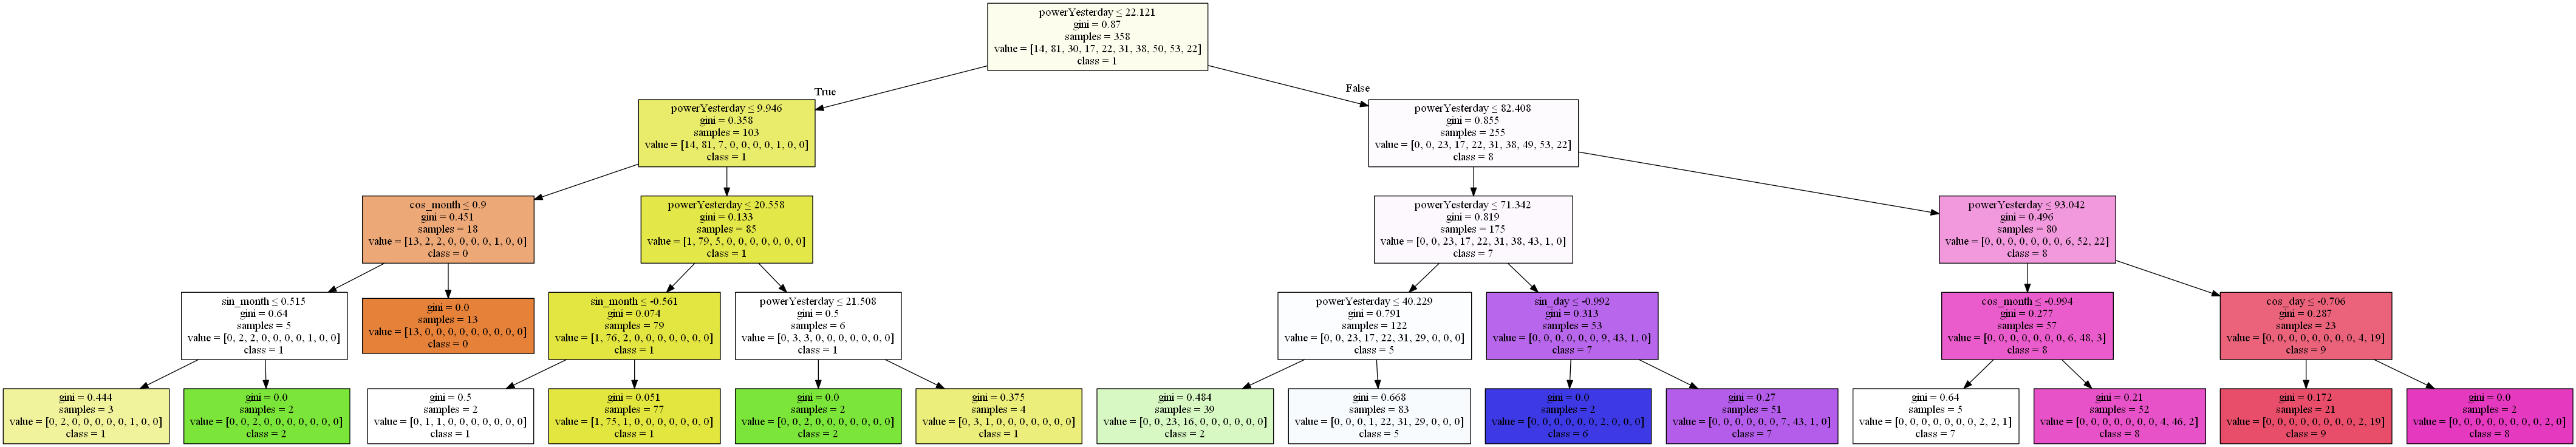

In [529]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,
                filled=True, 
                rounded=False,
                special_characters=True,
                feature_names = list(X_train.columns),
                class_names=classnames)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('classification_tree.png')
Image(graph.create_png())

### Measuring model performance using cross validation

In [422]:
# Further reading:
# https://en.wikipedia.org/wiki/Cross-validation_(statistics)

In [423]:
import sklearn
from sklearn.model_selection import cross_val_score

# Get build in cross_validation metrics
# print(sorted(sklearn.metrics.SCORERS.keys()))

# Calculate metrics: one metric for each single model in the n-fold cross validation
scores = cross_val_score(clf, X_test, y_test, cv=10, scoring = 'accuracy')
print("Cross validation results:")
for i in scores:
    print(format(i, '.4f'))

# print( format(scores.round(4), '.4f') )

# The mean score and the 95% confidence interval of the score estimate are given by:
print("Accuracy (mean of cross validation): %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Cross validation results:
0.3056
0.6111
0.6857
0.3429
0.4857
0.6571
0.6571
0.4857
0.5714
0.3714
Accuracy (mean of cross validation): 0.5174 (+/- 0.2666)


### Pruning the tree

In [424]:
# Explanation
# Pruning is applied for two purposes: a) to reduce the complexity of a tree, i.e. make it more 'generell' and b) to reduce overfitting

# Furter reading:
# https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

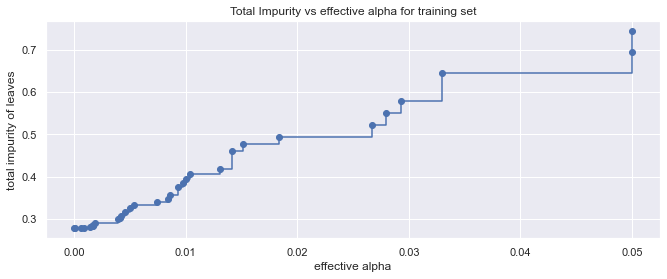

In [425]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# Fit the tree
clf = DecisionTreeClassifier(random_state=5)

# Pruning
# ccp_alpha  = cost complexity parameter
# impurity   = Gini impurity
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot total impurity vs effective alpha
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [426]:
# Next, we train a decision tree using the effective alphas.
# The last value in ccp_alphas is the alpha value that prunes the whole tree, 
# leaving the tree, clfs[-1], with one node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=5, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1].round(6)))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.125843


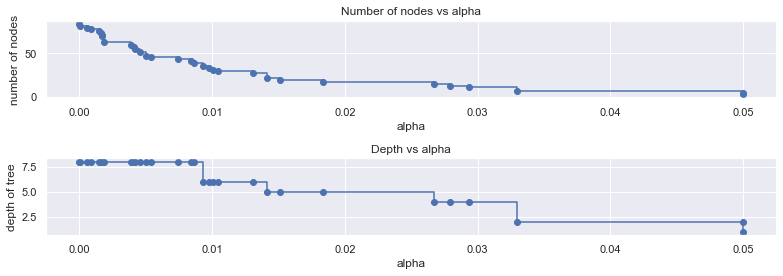

In [427]:
# In the step above we removed the last element in clfs and ccp_alphas, 
# because it is the trivial tree with only one node. Here we show that 
# the number of nodes and tree depth decreases as alpha increases.

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Plots number of nodes vs alpha and depth vs alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Training accuracy (start value): 0.790503
Testing accuracy (start value): 0.448864
ccp_alpha with maximized testing accuracy: 0.014171


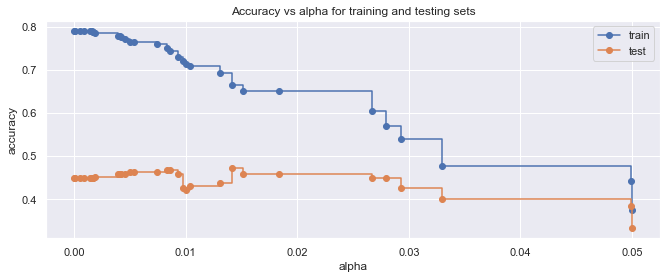

In [428]:
# Prediction accuracy vs alpha for training and testing sets¶:
# When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, 
# the tree overfits, leading to a 100% training accuracy and 82% testing accuracy. As alpha increases, 
# more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, 
# setting ccp_alpha=0.000134 maximizes the testing accuracy.

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
print("Training accuracy (start value): %0.6f" % train_scores[0])
print("Testing accuracy (start value): %0.6f" % test_scores[0])

max_index = dict(zip(test_scores,range(len(test_scores))))[max(test_scores)]
print('ccp_alpha with maximized testing accuracy:', ccp_alphas[max_index].round(6))

# Plot showing the full range of ccp_alphas, train_scores and test_scores
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
# ax.axvline(ccp_alphas[max_index], color='r', linestyle='--', lw=1)
ax.legend()
plt.show()

### Regression trees

Definition
A regression tree refers to an algorithm where the target variable is continuous and the algorithm is used to predict it’s value. As an example of a regression type problem, you may want to predict the selling prices of a residential house, which is acontinuous target variable.

Further reading:
https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16

In [524]:
# Data
from datetime import datetime, timedelta
energyByDay_ma = energyByDay.rolling(window=window).mean()
energy_rt = energyByDay_ma['2018-01-01':'2020-12-31']
energy_rt = energy_rt.dropna()

energy_rt['origDate'] = pd.to_datetime(energy_rt.index.date).strftime("%Y.%m.%d")
energy_rt['date'] = pd.to_datetime(energy_rt.index.date)
energy_rt = energy_rt.set_index('date')
#print(energy_rt)
energy_rt['powerYesterday'] = 0.0;
for idx, data in energy_rt.iterrows():
    yesterday = idx - timedelta(days=1)
    #print(type(idx), type(yesterday))
    yesterDayElem = energy_rt[energy_rt['origDate'].str.contains(yesterday.strftime("%Y.%m.%d"))]
    #print(yesterDayElem)
    if(len(yesterDayElem) > 0):
        #print('adding',yesterday, yesterDayElem.producedDay[0])
        energy_rt['powerYesterday'][idx] = yesterDayElem.producedDay[0]
    
print(energy_rt.head(5))

# Split data into target variable (y) and explanatory variables (X)
feature_cols = ['powerYesterday',
                'd0_TEMPERATURE_MAXIMUM',
                'sin_day',
                'cos_day',
                'sin_month',
                'cos_month'
]

X = energy_rt[feature_cols]  # Features
y = energy_rt.producedDay   # Target variable

# Sampling train and test data
X_train = X.loc['2018-01-01':'2018-12-31']
X_test  = X.loc['2019-01-01':'2019-12-31']
y_train = y.loc['2018-01-01':'2018-12-31']
y_test  = y.loc['2019-01-01':'2019-12-31']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

                     ID  d0_ENERGY_DAY  d0_ENERGY_MONTH  d0_ENERGY_YEAR  \
date                                                                      
2018-01-03  9407.416667       3.083333        19.833333     7816.250000   
2018-01-04  9443.250000       2.891667        21.333333     7109.000000   
2018-01-05  9482.166667       3.358333        23.250000     6402.166667   
2018-01-06  9523.000000       3.658333        25.500000     5695.666667   
2018-01-07  9564.333333       3.991667        28.083333     4989.500000   

            d0_ENERGY_TOTAL  d0_TEMPERATURE_MAXIMUM    d0_P_AC  d0_U_AC_L1  \
date                                                                         
2018-01-03     30825.416667               23.250000  51.250000  135.600000   
2018-01-04     30832.416667               23.333333  61.666667  154.983333   
2018-01-05     30839.916667               23.833333  62.916667  155.383333   
2018-01-06     30847.750000               24.000000  52.000000  136.166667   
2018-0

R2 (cross validation mean): 0.14 (+/- 1.64)


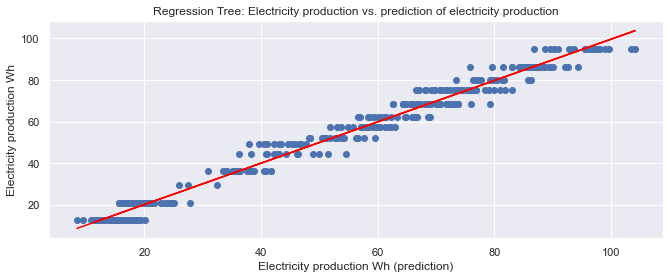

In [525]:
# Regression tree
from sklearn.tree import DecisionTreeRegressor # Decision Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
reg = DecisionTreeRegressor(max_depth=4, random_state = 5)

# Train Decision Tree Classifer
reg = reg.fit(X_train, y_train)

# Cross validation using R2 as cv-score
cv_score = cross_val_score(reg, X_test, y_test, cv=5, scoring ='r2')
print("R2 (cross validation mean): %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

# Predict the response for test dataset
y_pred = reg.predict(X_test)

# Plot target variable versus prediction
import numpy as np
import matplotlib.pyplot as plt

m, b = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred, alpha=1.0)
plt.plot(y_test, m*y_test + b, color="red")
plt.title('Regression Tree: Electricity production vs. prediction of electricity production')
plt.xlabel('Electricity production Wh (prediction)')
plt.ylabel('Electricity production Wh')
plt.show()

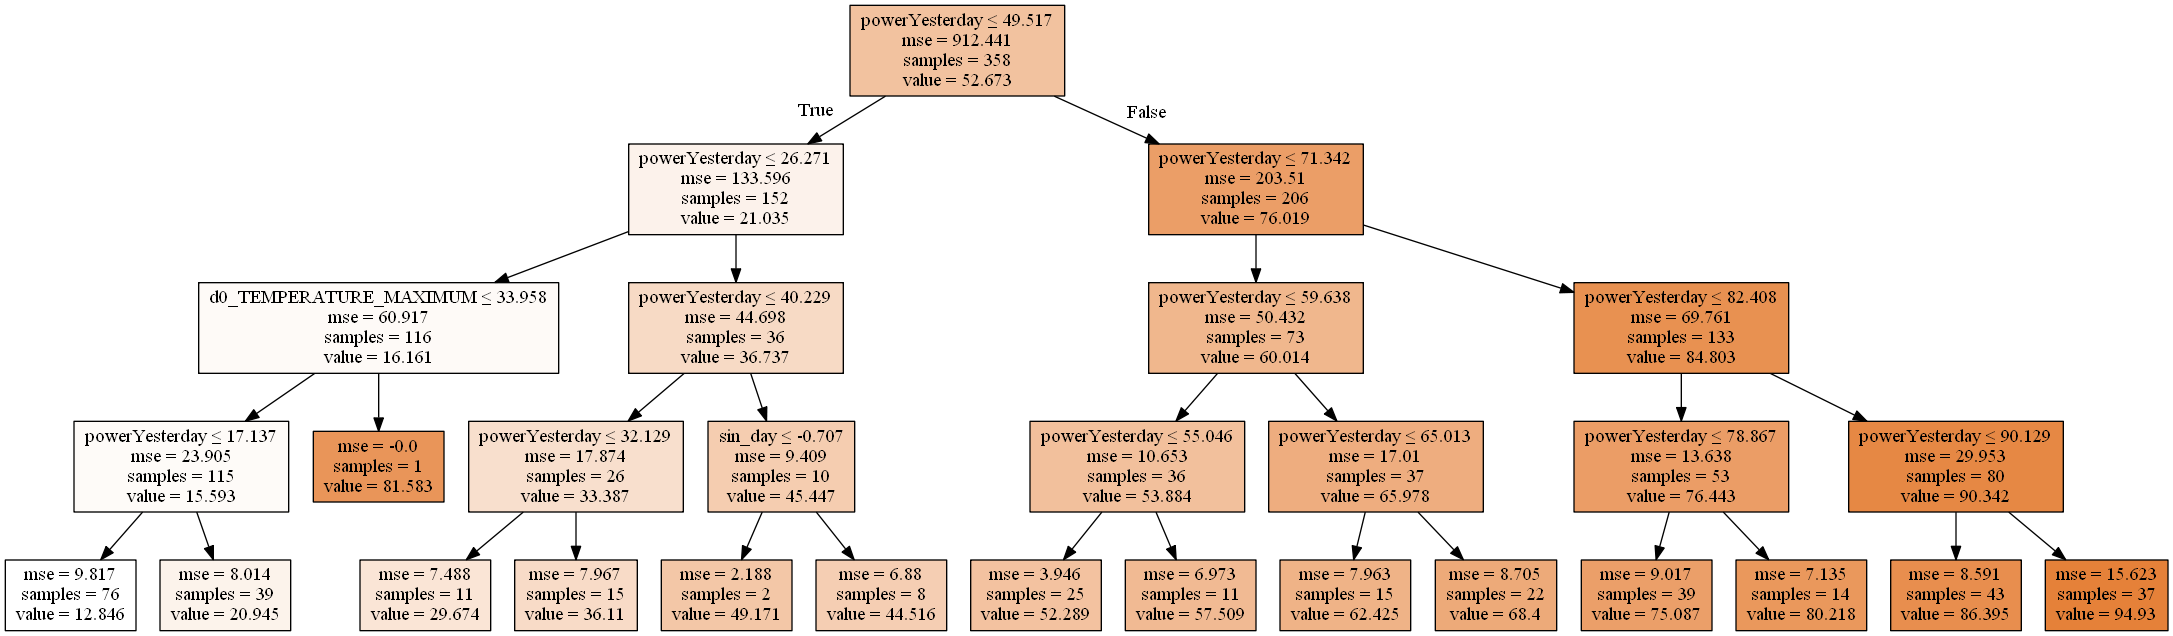

In [526]:
# Vizualizing the tree
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(reg, 
                out_file=dot_data,
                filled=True, 
                rounded=False,
                special_characters=True,
                feature_names = list(X_train.columns)
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('regression_tree.png')
Image(graph.create_png())

### Random Forest

In [455]:
# Explanation:
# Random forest is an ensemble learning method for classification or regression 
# that operate by constructing a multitude of decision trees at training time 
# and outputting the class that is the mode of the classes (classification) 
# or mean prediction (regression) of the individual trees.

In [456]:
energy.max()

ID                                      84679
solarinstallationname      Morgenacherstr. 50
requesttime               2021.01.11 16:06:16
d0_ENERGY_DAY                            57.9
d0_ENERGY_MONTH                        1482.1
d0_ENERGY_YEAR                         9986.6
d0_ENERGY_TOTAL                         58062
d0_TEMPERATURE_MAXIMUM                     49
d0_P_AC                                 16000
d0_U_AC_L1                              245.7
d0_U_AC_L2                              245.7
d0_U_AC_L3                              244.8
d0_I_AC_L1                               13.4
d0_I_AC_L2                              13.35
d0_I_AC_L3                               13.4
d0_U_AC_10_MIN_MEAN_L1                  244.8
d0_U_AC_10_MIN_MEAN_L2                  244.9
d0_U_AC_10_MIN_MEAN_L3                  244.6
d0_U_DC_L1                              773.1
d0_U_DC_L2                              774.1
d0_I_DC_L1                               7.77
d0_I_DC_L2                        

In [64]:
# Data
energy.sub = energy.loc['2009-01-01':'2018-12-31']
energy.sub = energy.sub.dropna()

# Target and exaplanatory variables
y = pd.DataFrame(energy.sub,columns=['total_cons'])
X = pd.DataFrame(energy.sub,columns=['cloudcover',
                                    'humidity',
                                    'precipitation',
                                    'snowdepth',
                                    'sunshine',
                                    'temperature_mean', 
                                    'temperature_max', 
                                    'temperature_min',
                                    'sin_hour', 
                                    'cos_hour', 
                                    'sin_weekday',
                                    'cos_weekday',
                                    'sin_month',
                                    'cos_month'
                                    ]
                    )

# One hot encoding weekdays and hours
# X = pd.concat([X,pd.get_dummies(energy.sub['weekday'], prefix='wd')], axis=1)
# X = pd.concat([X,pd.get_dummies(energy.sub['time_hour'], prefix='hr')], axis=1)

# Train and test data
X_train = X.loc['2009-01-01':'2018-04-30']
X_test  = X.loc['2018-05-01':'2018-05-31']
y_train = y.loc['2009-01-01':'2018-04-30']
y_test  = y.loc['2018-05-01':'2018-05-31']

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

In [73]:
#6. Develop a random forest (RF) model on the basis of 'the new data' set.  
#   => Is based on moving avarage (MA)
energy_ma.sub = energy_ma.loc['2009-01-01':'2018-12-31']
energy_ma.sub = energy_ma.sub.dropna()

# Target and exaplanatory variables
y2 = pd.DataFrame(energy_ma.sub,columns=['total_cons'])
X2 = pd.DataFrame(energy_ma.sub,columns=['cloudcover',
                                    'humidity',
                                    'precipitation',
                                    'snowdepth',
                                    'sunshine',
                                    'temperature_mean', 
                                    'temperature_max', 
                                    'temperature_min',
                                    'sin_hour', 
                                    'cos_hour', 
                                    'sin_weekday',
                                    'cos_weekday',
                                    'sin_month',
                                    'cos_month'
                                    ]
                    )

# One hot encoding weekdays and hours
# X = pd.concat([X,pd.get_dummies(energy.sub['weekday'], prefix='wd')], axis=1)
# X = pd.concat([X,pd.get_dummies(energy.sub['time_hour'], prefix='hr')], axis=1)

# Train and test data
X_train2 = X2.loc['2009-01-01':'2018-04-30']
X_test2  = X2.loc['2018-05-01':'2018-05-31']
y_train2 = y2.loc['2009-01-01':'2018-04-30']
y_test2 = y2.loc['2018-05-01':'2018-05-31']

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

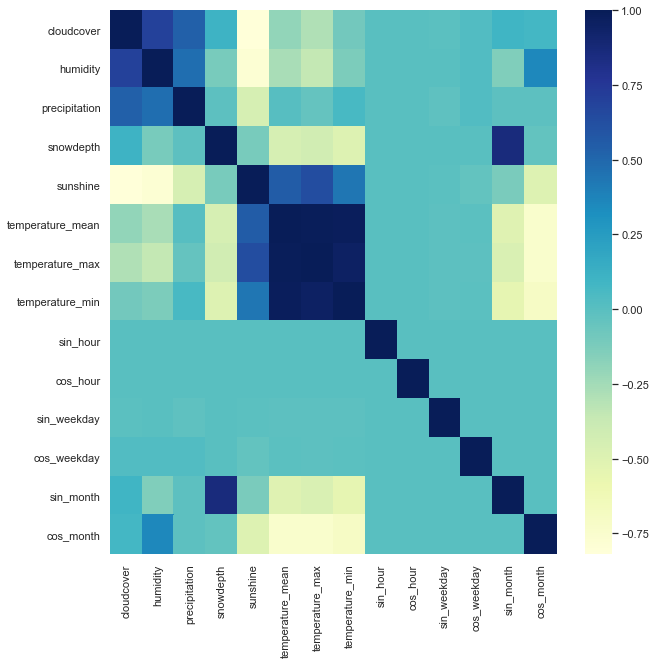

In [65]:
# Visually check for correlation between the explanatory variables (mulicollinearity)
# Settings: https://likegeeks.com/seaborn-heatmap-tutorial
plt.figure(figsize=(10, 10))
sns.heatmap(X_train.corr(), cmap="YlGnBu")
plt.show()

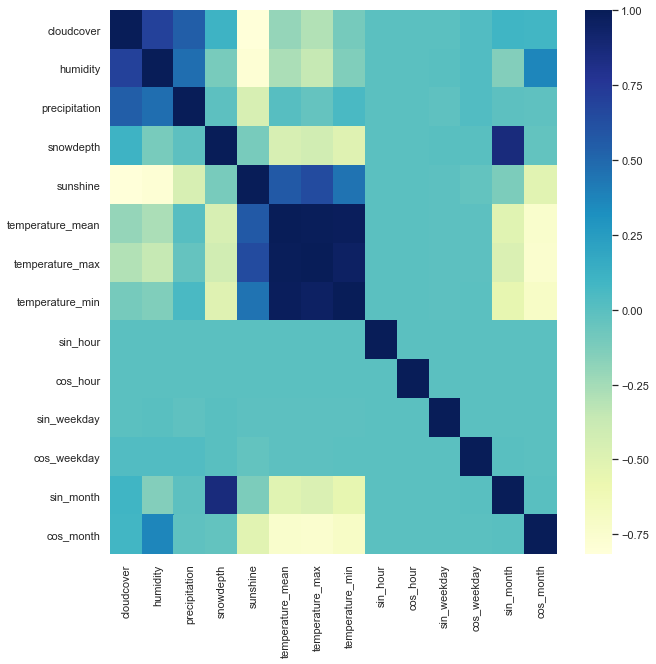

In [74]:
# Visually check for correlation between the explanatory variables (mulicollinearity)
# Settings: https://likegeeks.com/seaborn-heatmap-tutorial
plt.figure(figsize=(10, 10))
sns.heatmap(X_train2.corr(), cmap="YlGnBu")
plt.show()

In [75]:
# Random forest regression
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

m1 = RandomForestRegressor(n_estimators=100,max_depth=20)
m1.fit(X_train,y_train)

RandomForestRegressor(max_depth=20)

In [76]:
# Random forest regression
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

m2 = RandomForestRegressor(n_estimators=100,max_depth=20)
m2.fit(X_train2,y_train2)

RandomForestRegressor(max_depth=20)

### Feature importance

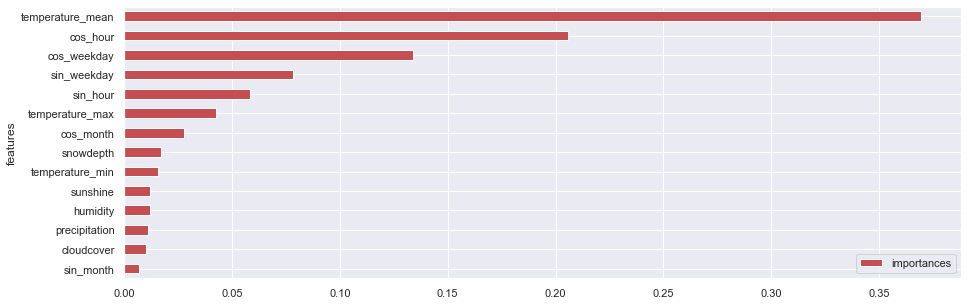

In [77]:
cols = X_train.columns

# Derive feature importance from random forest
importances = m1.feature_importances_
std         = np.std([tree.feature_importances_ for tree in m1.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# print( cols[indices] )
# print( importances[indices] )

# Barplot with feature importance
df = pd.DataFrame({'features':cols,'importances': importances})
df.sort_values('importances', inplace=True)
df.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

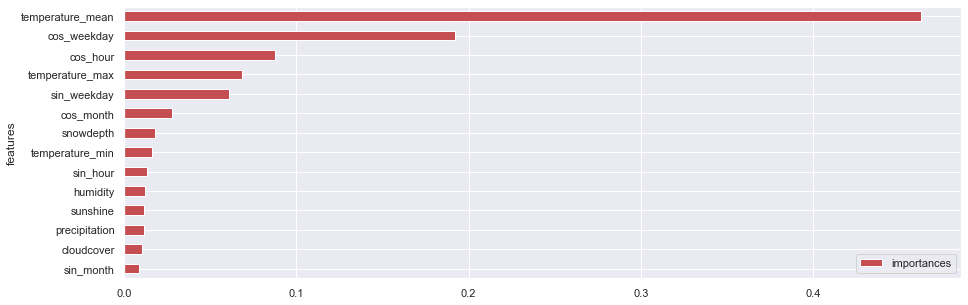

In [78]:
#7. Analyse the feature importance in the RF model.
cols2 = X_train2.columns

# Derive feature importance from random forest
importances2 = m2.feature_importances_
std2 = np.std([tree2.feature_importances_ for tree2 in m2.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]

# print( cols[indices] )
# print( importances[indices] )

# Barplot with feature importance
df2 = pd.DataFrame({'features':cols2,'importances': importances2})
df2.sort_values('importances', inplace=True)
df2.plot(kind='barh', y='importances', x='features', color='r', figsize=(15,5))

In [79]:
m1_predict_train = m1.predict(X_train).reshape(-1,1)
m1_predict_test  = m1.predict(X_test).reshape(-1,1)
print(m1_predict_train.shape)
print(m1_predict_test.shape)

(81768, 1)
(744, 1)


In [80]:
m2_predict_train = m2.predict(X_train2).reshape(-1,1)
m2_predict_test  = m2.predict(X_test2).reshape(-1,1)
print(m2_predict_train.shape)
print(m2_predict_test.shape)

(81757, 1)
(744, 1)


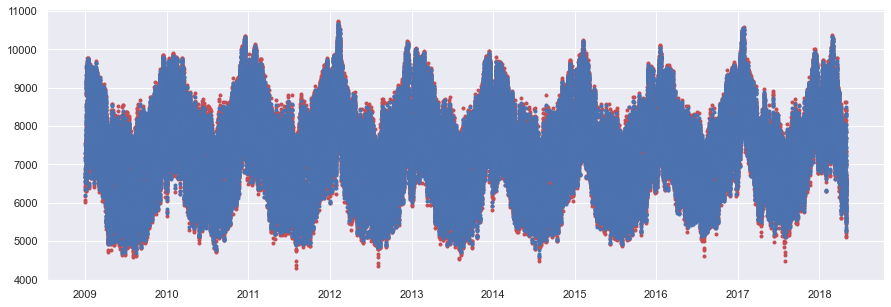

In [81]:
# Plot training data along with its predictions
plt.figure(figsize=(15,5))
plt.plot(X_train.index, y_train,'r.')
plt.plot(X_train.index, m1_predict_train,'b.')

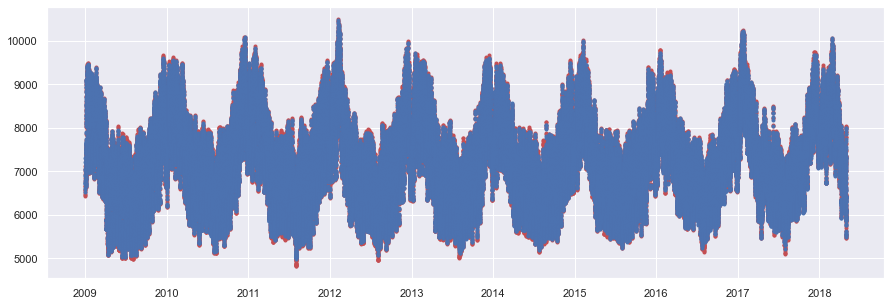

In [82]:
# Plot training data along with its predictions
plt.figure(figsize=(15,5))
plt.plot(X_train2.index, y_train2,'r.')
plt.plot(X_train2.index, m2_predict_train,'b.')

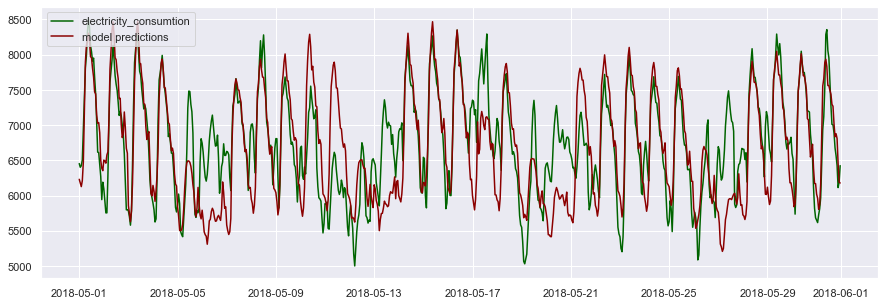

In [83]:
# Plot test data along with its predictions
plt.figure(figsize=(15,5))
plt.plot(X_test.index, y_test, color='darkgreen', label='electricity_consumtion')
plt.plot(X_test.index, m1_predict_test, color='darkred', label='model predictions')
plt.legend(loc="upper left")

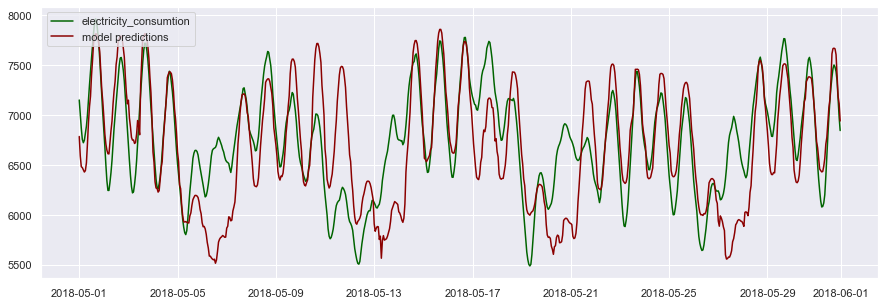

In [84]:
# Plot test data along with its predictions
plt.figure(figsize=(15,5))
plt.plot(X_test2.index, y_test2, color='darkgreen', label='electricity_consumtion')
plt.plot(X_test2.index, m2_predict_test, color='darkred', label='model predictions')
plt.legend(loc="upper left")

### Measuring the model performance

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Get build in cross_validation metrics
# print(sorted(sklearn.metrics.SCORERS.keys()))

# Construct additional scorer ...

# MAPE (mean absolute percentage error)
# https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_scorer = make_scorer(mean_absolute_percentage_error)

# MSE (mean squared error)
from sklearn.metrics import mean_squared_error
mse_scorer = make_scorer(mean_squared_error)

# Calculate metrics: one metric for each single model in the n-fold cross validation
scores = cross_val_score(m1, X_test, y_test, cv=5, scoring = mape_scorer)
print(scores.round(2))

# The mean score and the 95% confidence interval of the score estimate are given by:
print("MAPE (cross validation mean): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[11.48 11.51 11.94 10.51 11.3 ]
MAPE (cross validation mean): 11.35 (+/- 0.94)


In [88]:
#8. Compare the MAPE with the MAPE of the RF based on the data set with a moving average window of 12 hours.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Get build in cross_validation metrics
# print(sorted(sklearn.metrics.SCORERS.keys()))

# Construct additional scorer ...

# MAPE (mean absolute percentage error)
# https://en.wikipedia.org/wiki/Mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_scorer = make_scorer(mean_absolute_percentage_error)

# MSE (mean squared error)
from sklearn.metrics import mean_squared_error
mse_scorer = make_scorer(mean_squared_error)

# Calculate metrics: one metric for each single model in the n-fold cross validation
scores2 = cross_val_score(m2, X_test2, y_test2, cv=5, scoring = mape_scorer)
print(scores2.round(2))

# The mean score and the 95% confidence interval of the score estimate are given by:
print("MAPE using MovingAverage  (cross validation mean): %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))
print("MAPE without MovingAverage(cross validation mean): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[8.91 8.53 9.49 7.25 7.89]
MAPE using MovingAverage  (cross validation mean): 8.41 (+/- 1.56)
MAPE without MovingAverage(cross validation mean): 11.35 (+/- 0.94)


#### Using the moving average is better the MAPE is lower but the standard diff is bigger (unclear if good or bad)?

### Useful Weblinks

In [43]:
# Working with pandas dataframes
# https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
# https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

# Time series analysis:
# https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-time-series-analysis-in-python-a270cb05e0b3
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
# https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

# Classification and regression trees (CART)
# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# https://www.digitalvidya.com/blog/classification-and-regression-trees
# https://www.nature.com/articles/nmeth.4370
# https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16
# http://alumni.media.mit.edu/~tpminka/courses/36-350.2001/lectures/day19/

# Random forest
# https://petolau.github.io/Ensemble-of-trees-for-forecasting-time-series/
# https://stats.stackexchange.com/questions/384924/using-a-random-forest-for-time-series-data
# https://www.statworx.com/ch/blog/time-series-forecasting-with-random-forest/
# https://medium.com/turo-engineering/how-not-to-use-random-forest-265a19a68576
# https://codeburst.io/machine-learning-basic-understand-the-limit-of-trees-with-time-series-data-53875b1f1ef8
# https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float
# https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
# https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-15-276
# https://medium.com/datadriveninvestor/why-wont-time-series-data-and-random-forests-work-very-well-together-3c9f7b271631

# Cross validation, model performance metrics
# https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial
# https://scikit-learn.org/stable/modules/cross_validation.html
# # https://www.researchgate.net/figure/nterpretation-of-typical-MAPE-values_tbl1_257812432